In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("twitter_validation.csv", header=None)

# Rename columns
df.columns = ['id', 'brand', 'sentiment', 'text']

# Show first few rows
df.head()


,id,brand,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
import re
import string

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    return text.strip()

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)


<ipython-input-7-c0490e70708c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette='Set2')


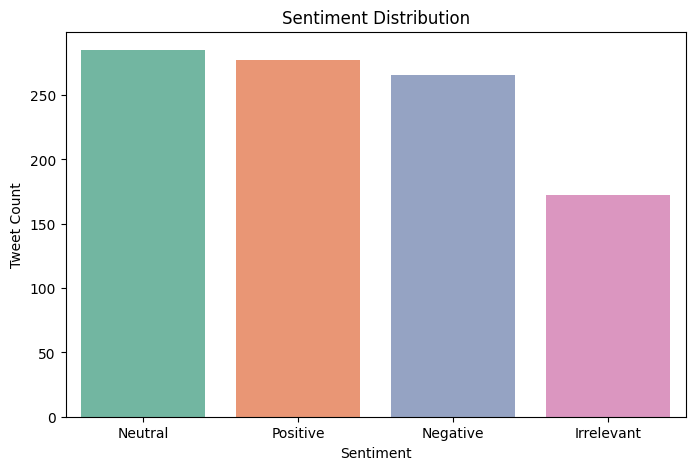

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


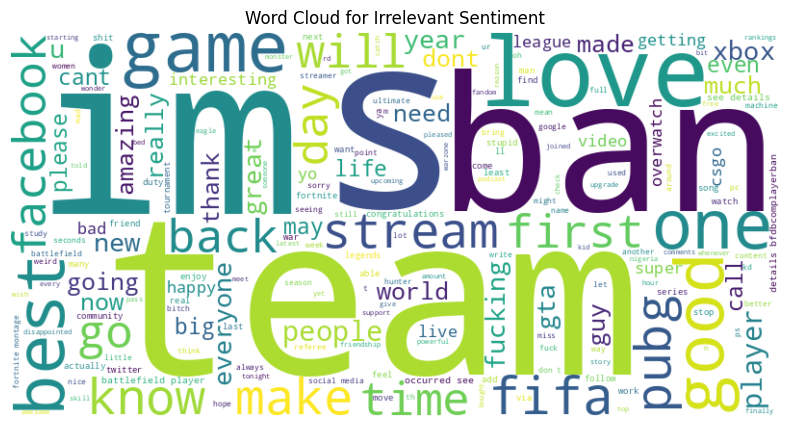

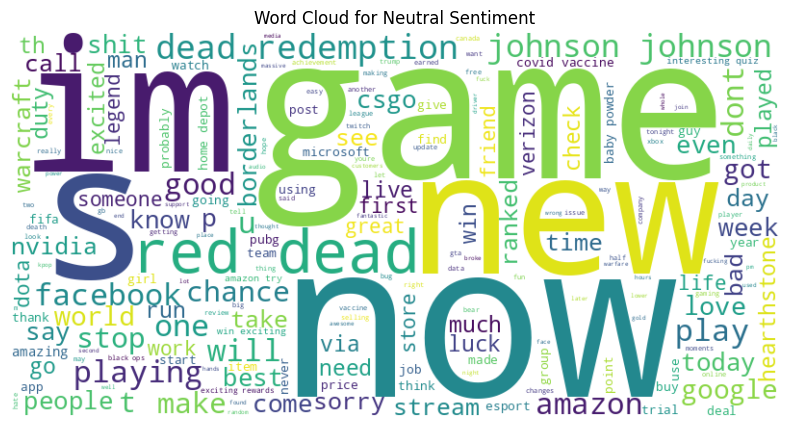

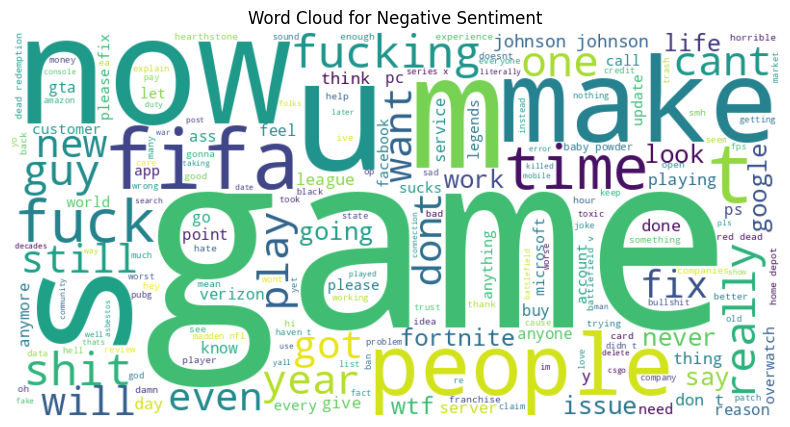

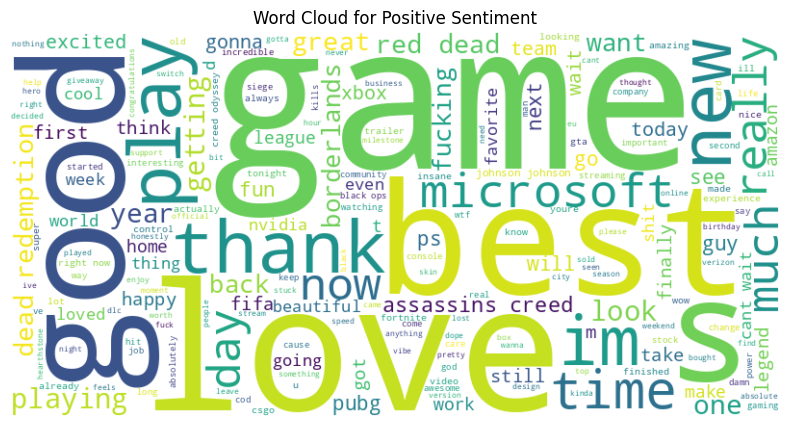

In [ ]:
from wordcloud import WordCloud

for sentiment in df['sentiment'].unique():
    text = " ".join(df[df['sentiment'] == sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.show()


In [ ]:
from collections import Counter

for sentiment in df['sentiment'].unique():
    words = " ".join(df[df['sentiment'] == sentiment]['clean_text']).split()
    most_common = Counter(words).most_common(10)
    print(f"\nTop 10 words in {sentiment} tweets:")
    for word, count in most_common:
        print(f"{word}: {count}")



Top 10 words in Irrelevant tweets:
the: 126
a: 84
to: 72
of: 63
and: 56
i: 54
is: 54
in: 49
for: 47
this: 42

Top 10 words in Neutral tweets:
the: 163
to: 124
a: 119
and: 115
of: 83
i: 80
for: 69
is: 64
this: 58
in: 56

Top 10 words in Negative tweets:
the: 165
and: 113
i: 109
to: 105
a: 102
is: 92
of: 71
for: 66
you: 65
this: 65

Top 10 words in Positive tweets:
the: 172
to: 129
i: 128
and: 112
a: 88
is: 75
of: 74
this: 67
for: 56
in: 53
